In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
dataset = pd.read_csv(r"C:\Users\eabhaya\Desktop\ASSIGNMENTS  EXCELR\Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

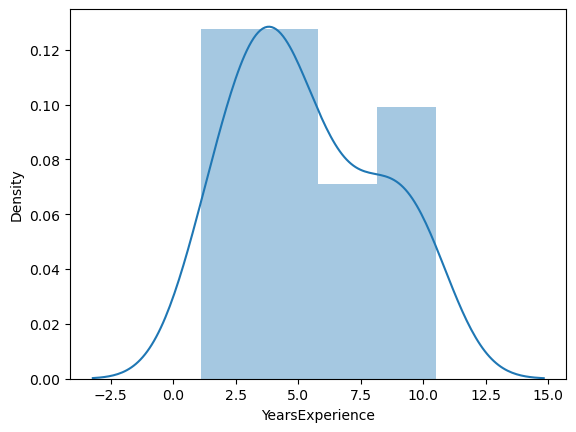

In [5]:
sns.distplot(dataset['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

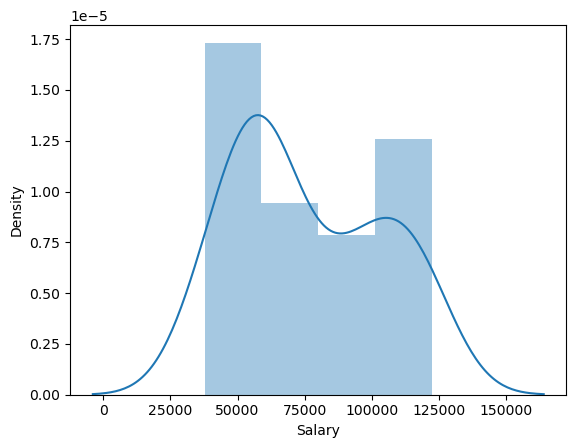

In [6]:
sns.distplot(dataset['Salary'])

<Axes: >

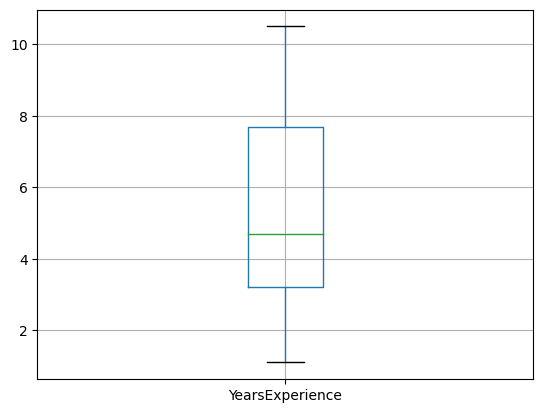

In [7]:
dataset.boxplot(['YearsExperience'])

<Axes: >

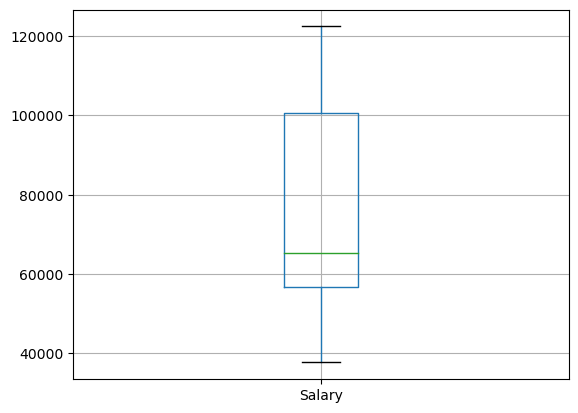

In [8]:
dataset.boxplot(['Salary'])

In [ ]:
#no outliers found

In [9]:
#correlation 
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#fitting model

<Axes: xlabel='YearsExperience', ylabel='Salary'>

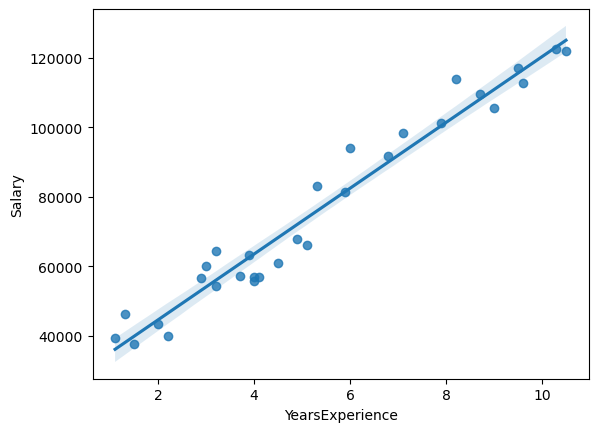

In [10]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [11]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

In [12]:
#coeffiecients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
#t and p-Values
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [14]:
#R squared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## model predictions

In [15]:
#manual prediction
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [16]:
#automatic prediction
#prediction for say 3 & 5 years exp
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [17]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [18]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64